# Heart Disease dataset

## Objectif

On utilise pour ce projet un jeu de données récolté pendant une étude sur les maladies cardiaques réalisée par la fondation de la clinique de Cleveland aux États-Unis. Il s'agit pour chaque patient testé d'indiquer s'il a une maladie cardiaque ou non, et cette information est accompagnée de tout un ensemble de caractéristiques.

Le but ici sera donc de trouver un moyen de prédire si un patient est malade ou non en fonction des caractéristiques récoltées, spécifiquement en utilisant un arbre de décision.

## Import des données

In [191]:
# Setup

import TDlib as td
import pandas as pd
from pprint import pprint

# Import data

data = pd.read_csv('dataset.csv')

categories = {
    "sex":      {0: "Female",           1: "Male"},
    "cp":       {0: "Typical angina",   1: "Atypical angina",   2: "non-anginal pain",  3: "asymptomatic"},
    "fbs":      {0: "Below",            1: "Above"},
    "restecg":  {0: "Normal",           1: "Abnormal",          2: "hypertrophy"},
    "exang":    {0: "No",               1: "Yes"},
    "slope":    {1: "Upsloping",        2: "Flat",              3: "Downsloping"},
    "thal":     {3: "Normal",           6: "Fixed defect",      7: "Reversable defect"},
    "target":   {0: "Healthy",          1: "Sick"}
}

for criterion in categories.keys():
    data[criterion] = data[criterion].astype("category")

predict_column = "target"

## Description des données

In [192]:
# Visualize data

print(data)

     age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope  ca  \
0     63   1  3       145   233   1       0      150     0      2.3     0   0   
1     37   1  2       130   250   0       1      187     0      3.5     0   0   
2     41   0  1       130   204   0       0      172     0      1.4     2   0   
3     56   1  1       120   236   0       1      178     0      0.8     2   0   
4     57   0  0       120   354   0       1      163     1      0.6     2   0   
..   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ...  ..   
298   57   0  0       140   241   0       1      123     1      0.2     1   0   
299   45   1  3       110   264   0       1      132     0      1.2     1   0   
300   68   1  0       144   193   1       1      141     0      3.4     1   2   
301   57   1  0       130   131   0       1      115     1      1.2     1   1   
302   57   0  1       130   236   0       0      174     0      0.0     1   1   

    thal target  
0      1 

### Variables du jeu de données

On observe dans ce jeu de données 14 variables :

| Variable   | Type                           | Description                               |
|------------|--------------------------------|-------------------------------------------|
| `age`      | Variable quantitative discrète | Âge du patient (années)                   |
| `sex`      | Variable catégorielle          | Sexe du patient                           |
| `cp`       | Variable catégorielle          | Type de douleurs thoraciques              |
| `trestbps` | Variable quantitative continue | Pression artérielle au repos (mmHg)       |
| `chol`     | Variable quantitative continue | Taux de choléstérol (mg/dl)               |
| `fbs`      | Variable catégorielle          | Glycémie à jeun (> 120 mg/dl)             |
| `restecg`  | Variable catégorielle          | Résultats d'électrocardiographie au repos |
| `thalach`  | Variable quantitative discrète | Rythme cardiaque maximal (bpm)            |
| `exang`    | Variable catégorielle          | Angine dûe à l'exercice                   |
| `oldpeak`  | Variable quantitative continue | ?                                         |
| `slope`    | Variable catégorielle          | ?                                         |
| `ca`       | Variable quantitative discrète | ?                                         |
| `thal`     | Variable catégorielle          | ?                                         |
| `target`   | Variable catégorielle          | Diagnostic de maladie cardiaque           |

* Quatre de ces variables sont difficiles à comprendre pour quelqu'un qui ne fait pas de médecine (mais ce ne sera pas un problème de les utiliser pour ce projet)
* On note une grande quantité de variables catégorielles
* `target` est la variable que l'on va tenter de prédire

In [193]:
# Describe data

print(data.describe(percentiles=[0.5]))

print("\nRépartition des diagnostics :")
print(data['target'].value_counts(normalize=True) * 100)
print("\nRépartition des sexes :")
print(data['sex'].value_counts(normalize=True) * 100)

              age    trestbps        chol     thalach     oldpeak          ca
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604    0.729373
std      9.082101   17.538143   51.830751   22.905161    1.161075    1.022606
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000    0.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    4.000000

Répartition des diagnostics :
1    54.455446
0    45.544554
Name: target, dtype: float64

Répartition des sexes :
1    68.316832
0    31.683168
Name: sex, dtype: float64


* Un total de 303 patients a été testé
* 54.45 % d'entre eux ont été diagnostiqués malades
  * On a une répartition à peu près équitable entre les malades et non-malades
* 68.31 % d'entre eux sont des hommes
  * On note ici un forte tendance de maladie envers les hommes
* L'âge moyen des patients est 54.36 ans, avec un âge médian de 55 ans et un écart moyen de 9 ans
  * Cela montre un probable biais d'échantillonnage, car c'est une fourchette d'âge où on est plus susceptible de se trouver à l'hôpital en raison de problèmes de coeur, ou pour se faire dépister
* Il est difficile d'interpréter les autres variables quantitatives sans avoir de connaissances en médecine

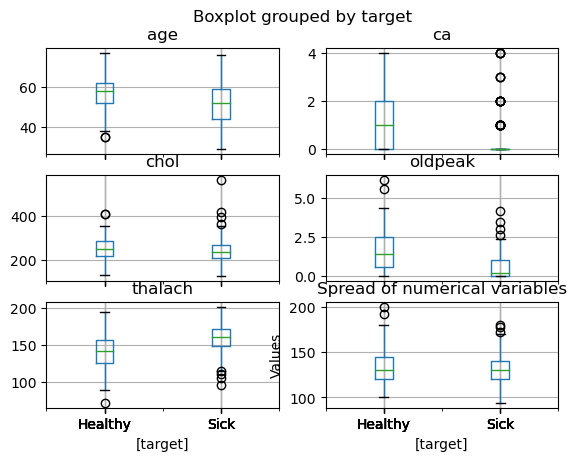

In [194]:
# Display boxplots

td.displayBoxplot(
    td.renameCategories(data, categories),
    predict_column,
    sharey=False
)

On remarque par ces boîtes à moustaches groupées que la variable `oldpeak` présente de grandes disparités qui semble être liées au diagnostic.

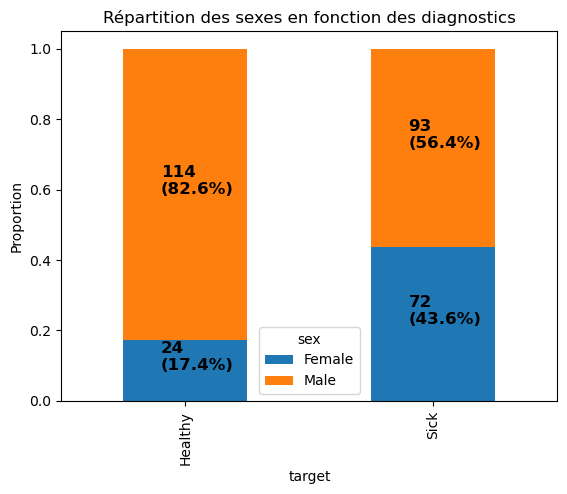

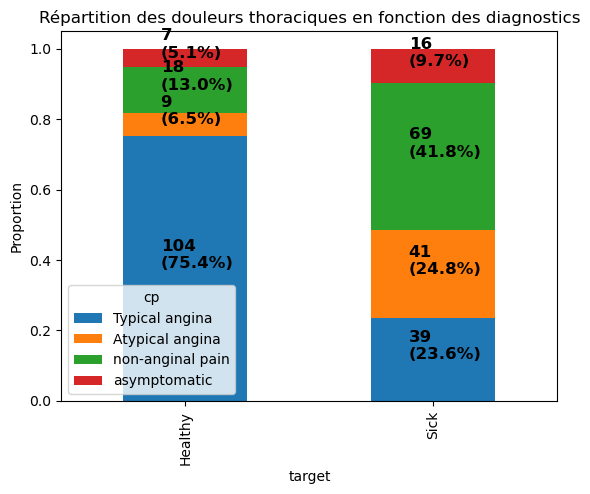

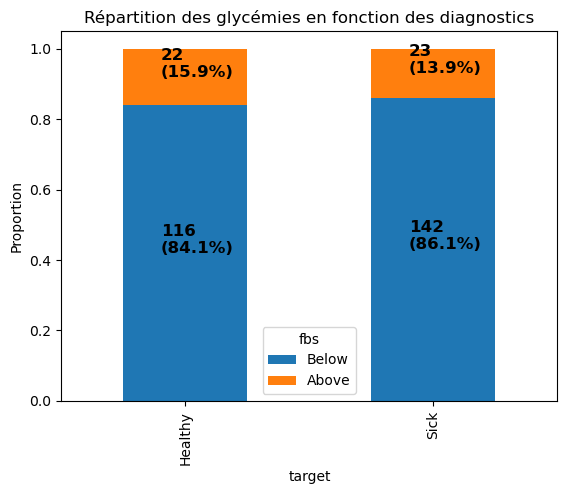

In [195]:
td.displayCrosstab(data, categories, ['target', 'sex'], "Répartition des sexes en fonction des diagnostics")
td.displayCrosstab(data, categories, ['target', 'cp'], "Répartition des douleurs thoraciques en fonction des diagnostics")
td.displayCrosstab(data, categories, ['target', 'fbs'], "Répartition des glycémies en fonction des diagnostics")

On note que :
* La proportion d'hommes est bien plus grande chez les patiens sains, alors que c'est relativement équilibré chez les patiens malades
* Les patients sains semblent présenter tous le même type de douleurs thoraciques, alors que les douleurs non-anginales semblent être majoritaires chez les patients malades
* La plupart des patients ont une faible glycémie, et la proportion est identique chez les patients malades et les patients sains

## Utilisation d'un arbre de décision

Toutes les variables telles qu'elles nous sont données ne semblent pas montrer de manière claire une façon de prédire le diagnostic, il va donc falloir recourir à un arbre de décision pour tenter de le faire.

### Mise en forme des données d'entraînement et de test

In [196]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns!=predict_column]
Y = data[predict_column]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.describe())
print()
print(X_test.describe())
print()
print(Y_train.describe())
print()
print(Y_test.describe())

              age    trestbps        chol     thalach     oldpeak          ca
count  227.000000  227.000000  227.000000  227.000000  227.000000  227.000000
mean    54.237885  131.577093  248.074890  149.819383    1.008370    0.726872
std      8.715045   17.581844   50.238006   22.864897    1.163558    0.984540
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     48.000000  120.000000  212.000000  138.000000    0.000000    0.000000
50%     55.000000  130.000000  244.000000  154.000000    0.700000    0.000000
75%     61.000000  140.000000  276.000000  166.500000    1.600000    1.000000
max     71.000000  192.000000  417.000000  202.000000    6.200000    4.000000

            age    trestbps        chol     thalach    oldpeak         ca
count  76.00000   76.000000   76.000000   76.000000  76.000000  76.000000
mean   54.75000  131.763158  240.855263  149.131579   1.132895   0.736842
std    10.15234   17.522457   56.325413   23.169717   1.156245   1.135704
m

### Première tentative d'arbre

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0])


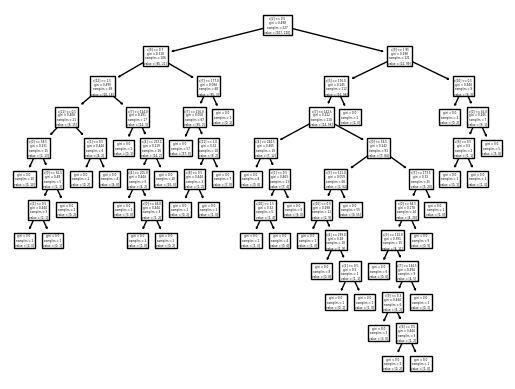

In [197]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, Y_train)

pprint(dtc.get_params())
print()

plot_tree(dtc)

predict = dtc.predict(X_test)
pprint(predict)

En laissant les paramètres par défaut, on obtient un arbre très complexe et illisible : on va donc jouer sur ces paramètres afin de le simplifier.

On pourra jouer notamment sur ceux-ci :

| Paramètre          | Description                                                      | Valeur par défaut |
|--------------------|------------------------------------------------------------------|-------------------|
| `criterion`        | Critère d'impureté utilisé                                       | Gini              |
| `max_depth`        | Distance maximale entre la racine et la feuille la plus éloignée | sans limite       |
| `min_samples_leaf` | Nombre minimum d'individus requis pour être une feuille valide   | 1                 |
| `ccp_alpha`        | Paramètre de complexité utilisé pour l'élagage                   | 0                 |

Afin de les évaluer, on va établir une plage de valeurs et observer l'évolution de l'_accuracy score_ de la prédiction afin de faire un choix.

Comme les résultats peuvent être variables, on va moyenner les _accuracy score_ sur un grand nombre de prédictions afin de faire un choix plus juste.

### Évaluation du paramètre `criterion`

Les 3 valeurs possibles de ce paramètres sont `gini`, `entropy` et `log_loss`.

In [198]:
from sklearn.metrics import accuracy_score

accuracies = {'gini': [], 'entropy': [], 'log_loss': []}

for i in range(200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

    for criterion in accuracies.keys():
        dtc = DecisionTreeClassifier(criterion=criterion)
        dtc = dtc.fit(X_train, Y_train)
        true = Y_test
        predict = dtc.predict(X_test)
        accuracies[criterion].append(accuracy_score(true, predict) * 100)

print(pd.DataFrame(accuracies).describe(percentiles=[]))

             gini     entropy    log_loss
count  200.000000  200.000000  200.000000
mean    75.921053   75.782895   75.868421
std      4.697151    4.893273    4.847441
min     63.157895   61.842105   60.526316
50%     76.315789   75.000000   76.315789
max     89.473684   86.842105   85.526316


On note que les trois paramètres ont des performances très similaires.

### Évaluation du paramètre `max_depth`

Afin de garder un arbre lisible, on va restreindre la plage de valeurs de `max_depth` à 15 noeuds maximum.

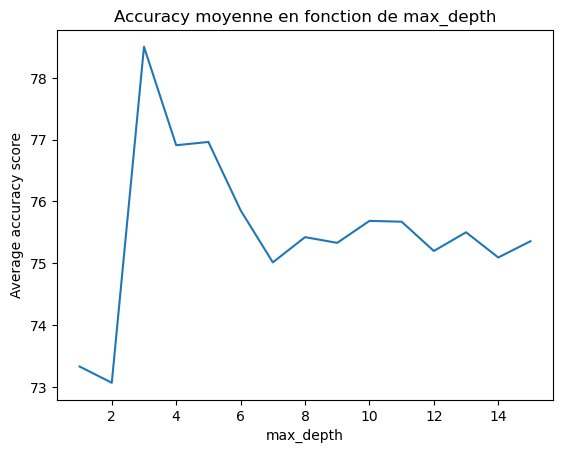

In [199]:
import matplotlib.pyplot as plt
import numpy as np

accuracies = dict.fromkeys(range(1, 16))
for max_depth in accuracies.keys():
    accuracies[max_depth] = []

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

    for max_depth in accuracies.keys():
        dtc = DecisionTreeClassifier(
            criterion='gini',
            max_depth=max_depth
        )
        dtc = dtc.fit(X_train, Y_train)
        true = Y_test
        predict = dtc.predict(X_test)
        accuracies[max_depth].append(accuracy_score(true, predict) * 100)


average_accuracies = dict.fromkeys(accuracies)
for max_depth in average_accuracies.keys():
    average_accuracies[max_depth] = np.array(accuracies[max_depth]).mean()

plt.plot(average_accuracies.keys(), average_accuracies.values())
plt.xlabel("max_depth")
plt.ylabel("Average accuracy score")
plt.title("Accuracy moyenne en fonction de max_depth")
plt.show()

On note une valeur remarquable : 3

On note qu'à partir de 7 et au delà, les performances soint moins bonnes et stagnent, donc ce n'est pas intéressant d'aller plus loin.

On continue donc avec `max_depth=3`.

### Évaluation du paramètre `min_samples_leaf`

Ce paramètre indiquant le nombre minimum d'invidius requis dans une feuille, sa valeur ne peut être plus grande que la taille du jeu de données original. Ce sera donc notre limite de test ici.

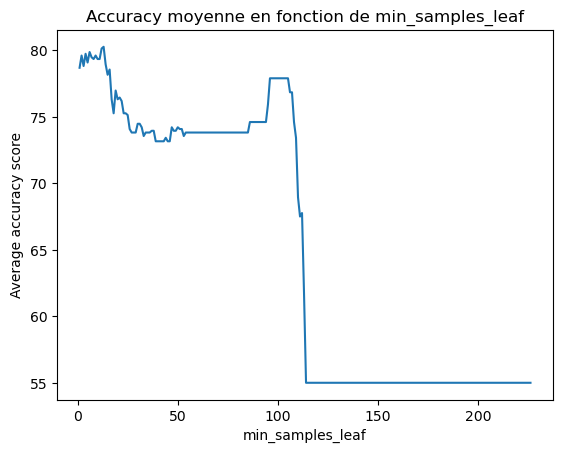

In [205]:
accuracies = dict.fromkeys(range(1, len(Y_train)))
for min_samples_leaf in accuracies.keys():
    accuracies[min_samples_leaf] = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

    for min_samples_leaf in accuracies.keys():
        dtc = DecisionTreeClassifier(
            criterion='gini',
            max_depth=3,
            min_samples_leaf=min_samples_leaf
        )
        dtc = dtc.fit(X_train, Y_train)
        true = Y_test
        predict = dtc.predict(X_test)
        accuracies[min_samples_leaf].append(accuracy_score(true, predict) * 100)


average_accuracies = dict.fromkeys(accuracies)
for min_samples_leaf in average_accuracies.keys():
    average_accuracies[min_samples_leaf] = np.array(accuracies[min_samples_leaf]).mean()

plt.plot(average_accuracies.keys(), average_accuracies.values())
plt.xlabel("min_samples_leaf")
plt.ylabel("Average accuracy score")
plt.title("Accuracy moyenne en fonction de min_samples_leaf")
plt.show()

Plus ce paramètre est grand, plus l'arbre sera petit, donc on cherche à le maximiser. On observe ainsi que la plage `[91-100]` semble être la plus appropriée.

### Évaluation du paramètre `ccp_alpha`

Ici, il s'agit de régler le paramètre $\alpha$ de l'algorithme CCP (Cost-Complexity Pruning) afin d'éviter de l'overfitting. Pour ce qui est de la plage de valeurs, elle sera déterminée ici par tâtonnements car je n'ai pas bien réussi à déterminer laquelle en regardant le principe de l'algorithme.

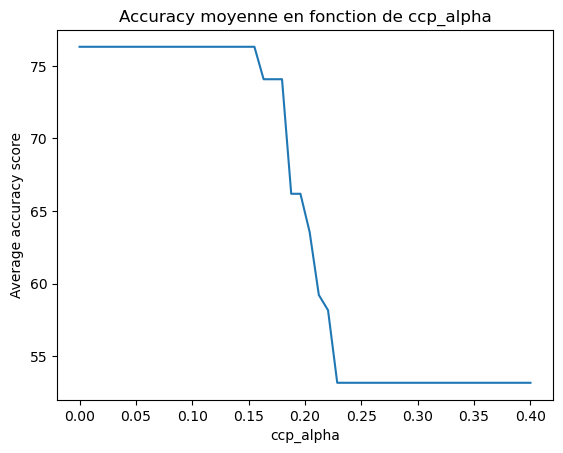

In [204]:
accuracies = dict.fromkeys(np.linspace(0, 0.4, 50))
for ccp_alpha in accuracies.keys():
    accuracies[ccp_alpha] = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

    for ccp_alpha in accuracies.keys():
        dtc = DecisionTreeClassifier(
            criterion='entropy',
            max_depth=4,
            min_samples_leaf=98,
            ccp_alpha=ccp_alpha
        )
        dtc = dtc.fit(X_train, Y_train)
        true = Y_test
        predict = dtc.predict(X_test)
        accuracies[ccp_alpha].append(accuracy_score(true, predict) * 100)


average_accuracies = dict.fromkeys(accuracies)
for ccp_alpha in average_accuracies.keys():
    average_accuracies[ccp_alpha] = np.array(accuracies[ccp_alpha]).mean()

plt.plot(average_accuracies.keys(), average_accuracies.values())
plt.xlabel("ccp_alpha")
plt.ylabel("Average accuracy score")
plt.title("Accuracy moyenne en fonction de ccp_alpha")
plt.show()


On remarque que ce paramètre ne semble pas avoir d'effet en l'état, jusqu'à la valeur de 0.15 environ où l'_accuracy score_ chute beaucoup. Le choix logique ici serait donc de le laisser à `0`.

## Arbre final

On a donc gardé les plages de valeurs suivantes :

| Paramètre          | Plage de valeurs |
|--------------------|------------------|
| `criterion`        | `entropy`        |
| `max_depth`        | `3`              |
| `min_samples_leaf` | de `91` à `100`  |
| `ccp_alpha`        | `0`              |

Par tâtonnements, il semblerait que tant que l'on reste dans ces plages de valeurs, on obtienne le score maximal.

Accuracy score : 77.63 %


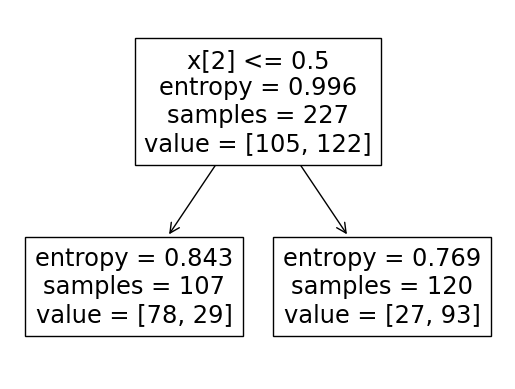

In [206]:
dtc = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=91,
    ccp_alpha=0.0
)

dtc = dtc.fit(X_train, Y_train)

true = Y_test
predict = dtc.predict(X_test)

print( f"Accuracy score : {accuracy_score(true, predict) * 100:.2f} %" )

plot_tree(dtc)
plt.show()


## Conclusion

En observant l'arbre final, qui est au final très simple avec seulement deux feuilles, il semblerait que la variable `cp` (douleurs thoraciques) soit déterminante pour cette prédiction d'après le classifieur DTC de sklearn, réglé d'après les méthodes exposées.